In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:

file_path = "/content/drive/MyDrive/Colab Notebooks/retail_store_sales.csv"
dataframe = pd.read_csv(file_path)

print(dataframe.head())

  Transaction ID Customer ID       Category          Item  Price Per Unit  \
0    TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5   
1    TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0   
2    TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5   
3    TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5   
4    TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5   

   Quantity  Total Spent  Payment Method Location Transaction Date  \
0      10.0        185.0  Digital Wallet   Online       2024-04-08   
1       9.0        261.0  Digital Wallet   Online       2023-07-23   
2       2.0         43.0     Credit Card   Online       2022-10-05   
3       9.0        247.5     Credit Card   Online       2022-05-07   
4       7.0         87.5  Digital Wallet   Online       2022-10-02   

  Discount Applied  
0             True  
1             True  
2            False  
3              NaN  
4          

In [4]:
df = dataframe.copy()

In [5]:
df.shape

(12575, 11)

In [6]:
print(df.dtypes)

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object


In [7]:
print(df.columns)

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')


## Find all missing values in each column

In [9]:
df.isnull().sum().sort_values(ascending=False)


,0
Discount Applied,4199
Item,1213
Price Per Unit,609
Total Spent,604
Quantity,604
Transaction ID,0
Customer ID,0
Category,0
Payment Method,0
Location,0


##Find the percentage of missing values per column

In [10]:
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False).round(2)
print(missing_percent)

Discount Applied    33.39
Item                 9.65
Price Per Unit       4.84
Total Spent          4.80
Quantity             4.80
Transaction ID       0.00
Customer ID          0.00
Category             0.00
Payment Method       0.00
Location             0.00
Transaction Date     0.00
dtype: float64


In [11]:
# Boolean Series: True if the row is a duplicate
duplicates = df.duplicated()

# How many duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [12]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [13]:
df.dtypes.value_counts()

,count
object,8
float64,3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


# Find the missing rows in [Price per unit, Quantity, and Total spent]

In [16]:
df[['Price Per Unit', 'Quantity', 'Total Spent']].isna().sum()

,0
Price Per Unit,609
Quantity,604
Total Spent,604


In [17]:
df[['Price Per Unit', 'Quantity', 'Total Spent']].isna().sum(axis=1).value_counts()

,count
0,11362
1,609
2,604


In [22]:
df['missing_UnitPrice'] = df['Price Per Unit'].isna()
df['missing_Quantity'] = df['Quantity'].isna()
df['missing_TotalSpent'] = df['Total Spent'].isna()

df.groupby(['missing_UnitPrice','missing_Quantity','missing_TotalSpent']).size()

,,,0
missing_UnitPrice,missing_Quantity,missing_TotalSpent,
False,False,False,11971


In [114]:
df.drop(columns=['missing_UnitPrice','missing_Quantity', 'missing_TotalSpent' ], inplace=True)

#Drop missing rows in both quantity and unit price

In [19]:
mask = df['Price Per Unit'].isna() & df['Quantity'].notna() & df['Total Spent'].notna()

df.loc[mask, 'Price Per Unit'] = df.loc[mask, 'Total Spent'] / df.loc[mask, 'Quantity']

In [20]:
df = df.dropna(subset=['Quantity', 'Total Spent'])

In [23]:
df[['Item']].isna().sum(axis=1).value_counts()

,count
0,11362
1,609


# Find the price of each Item

In [24]:
# Count how many unique items correspond to each unit price
price_counts = df.groupby('Price Per Unit')['Item'].nunique()

# See if any unit price maps to more than one item
conflicts = price_counts[price_counts > 1]

print(conflicts)

Price Per Unit
5.0     8
6.5     8
8.0     8
9.5     8
11.0    8
12.5    8
14.0    8
15.5    8
17.0    8
18.5    8
20.0    8
21.5    8
23.0    8
24.5    8
26.0    8
27.5    8
29.0    8
30.5    8
32.0    8
33.5    8
35.0    8
36.5    8
38.0    8
39.5    8
41.0    8
Name: Item, dtype: int64


In [67]:
df['Category'].value_counts()

,count
Category,
Furniture,1525
Electric household essentials,1516
Milk Products,1513
Food,1507
Butchers,1496
Beverages,1496
Computers and electric accessories,1477
Patisserie,1441


# Fill in missing items based on catagory, unit price, and total spent

In [25]:
# Step 1: Create a reference table of known items
ref = df[df['Item'].notna()][['Category', 'Price Per Unit', 'Total Spent', 'Item']].drop_duplicates()

# Step 2: Function to fill missing Item based on the three columns
def fill_item(row):
    if pd.isna(row['Item']):
        match = ref[
            (ref['Category'] == row['Category']) &
            (ref['Price Per Unit'] == row['Price Per Unit']) &
            (ref['Total Spent'] == row['Total Spent'])
        ]
        if len(match) == 1:
            return match['Item'].values[0]  # Only one match → fill it
        else:
            return row['Item']  # 0 or multiple matches → leave as NaN
    else:
        return row['Item']

# Step 3: Apply the function
df['Item'] = df.apply(fill_item, axis=1)

# Check remaining missing items
print(df['Item'].isna().sum())

7


In [26]:
df = df.dropna(subset=['Item'])

In [31]:
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,0
Price Per Unit,0
Quantity,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


#Fill in 'Discount Applied' based on expected price

In [28]:


# Step 1: Calculate Expected Total
df['ExpectedTotal'] = df['Quantity'] * df['Price Per Unit']

# Step 2: For rows where DiscountApplied is missing, compute it
missing_mask = df['Discount Applied'].isna()

df.loc[missing_mask, 'Discount Applied'] = df.loc[missing_mask].apply(
    lambda row: row['Total Spent'] < row['ExpectedTotal'] - 0.01,
    axis=1
)

/tmp/ipython-input-22279909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExpectedTotal'] = df['Quantity'] * df['Price Per Unit']


In [32]:
df.drop(columns=['ExpectedTotal'], inplace=True)

/tmp/ipython-input-885803848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ExpectedTotal'], inplace=True)


In [33]:
df[['Discount Applied']].value_counts()

,count
Discount Applied,
False,7947
True,4017


# Find the correlation of all numirical columns [Table and heat map]

In [34]:
df[['Quantity', 'Price Per Unit', 'Total Spent']].corr()

,Quantity,Price Per Unit,Total Spent
Quantity,1.000000,0.010629,0.711985
Price Per Unit,0.010629,1.000000,0.630936
Total Spent,0.711985,0.630936,1.000000


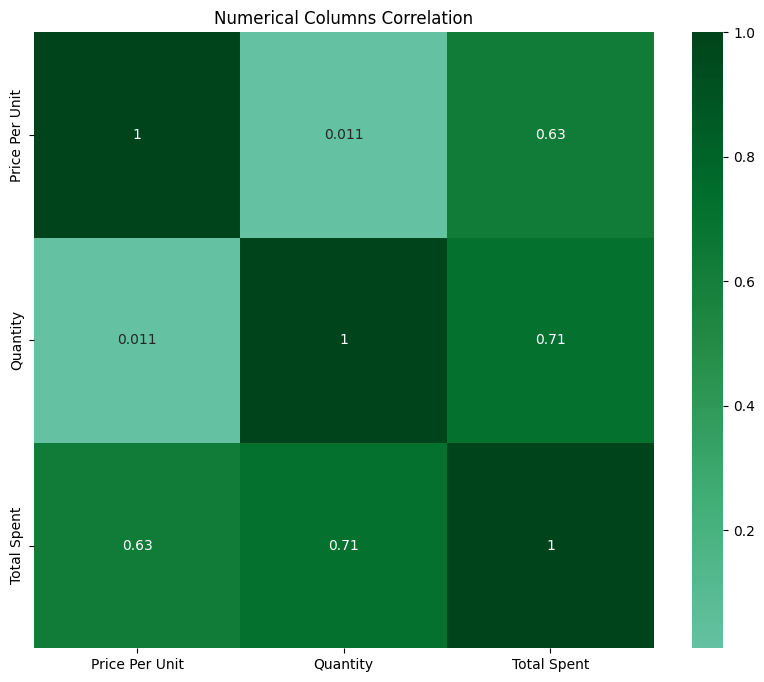

In [35]:


# Calculate correlation and plot
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='BuGn', center=0)
plt.title('Numerical Columns Correlation')
plt.show()

In [115]:
df.describe(include='all')

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
count,11964,11964,11964,11964,11964.000000,11964.000000,11964.000000,11964,11964,11964,11964
unique,11964,25,8,200,NaN,NaN,NaN,3,2,1114,2
top,TXN_2407494,CUST_24,Furniture,Item_2_BEV,NaN,NaN,NaN,Cash,Online,2022-05-30,False
freq,1,519,1524,128,NaN,NaN,NaN,4101,6065,26,7947
mean,NaN,NaN,NaN,NaN,23.357823,5.537613,129.672768,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,10.740725,2.857478,94.744581,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,1.000000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,14.000000,3.000000,51.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,23.000000,6.000000,108.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,33.500000,8.000000,192.000000,NaN,NaN,NaN,NaN


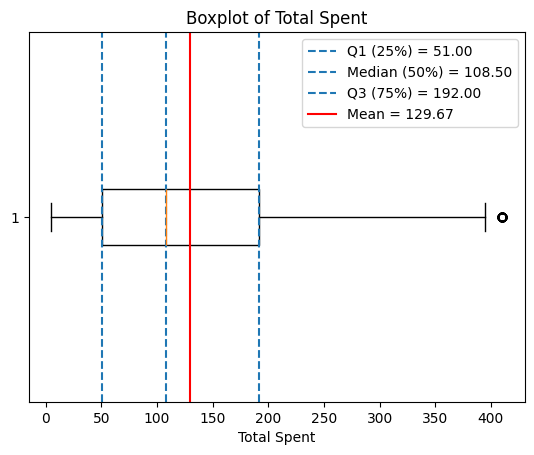

In [87]:

col = 'Total Spent'

# Calculate stats
q1 = df[col].quantile(0.25)
median = df[col].quantile(0.50)
q3 = df[col].quantile(0.75)
mean = df[col].mean()

plt.boxplot(df[col], vert=False)

# Add lines for each statistic
plt.axvline(q1, linestyle='--', label=f'Q1 (25%) = {q1:.2f}')
plt.axvline(median, linestyle='--', label=f'Median (50%) = {median:.2f}')
plt.axvline(q3, linestyle='--', label=f'Q3 (75%) = {q3:.2f}')
plt.axvline(mean, color='red', label=f'Mean = {mean:.2f}')

plt.legend()
plt.xlabel(col)
plt.title(f'Boxplot of {col}')

plt.show()

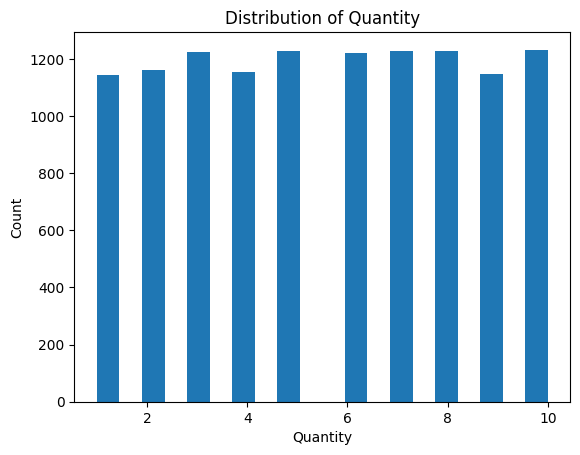

In [78]:
df['Quantity'].dropna().plot(kind='hist', bins=20)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

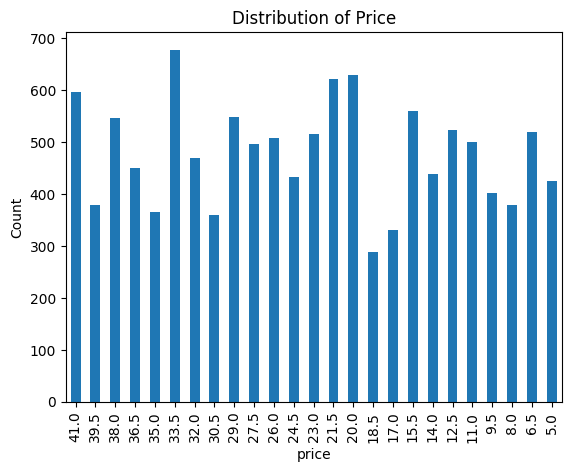

In [101]:
df['Price Per Unit'].value_counts().sort_index(ascending=False).plot(kind='bar')
plt.title('Distribution of Price')
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

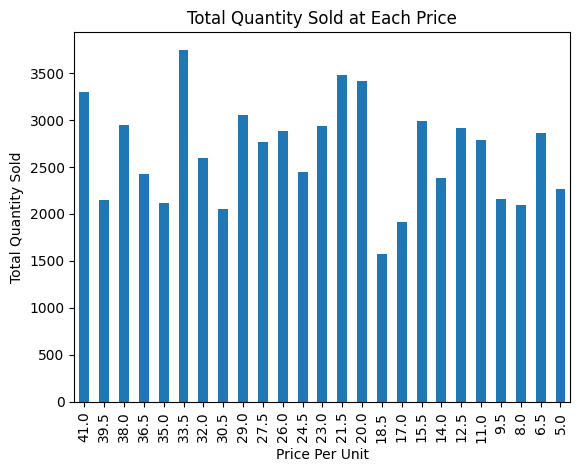

In [102]:
qty_per_price = df.groupby('Price Per Unit')['Quantity'].sum().sort_index(ascending=False)

qty_per_price.plot(kind='bar')
plt.xlabel('Price Per Unit')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold at Each Price')
plt.show()

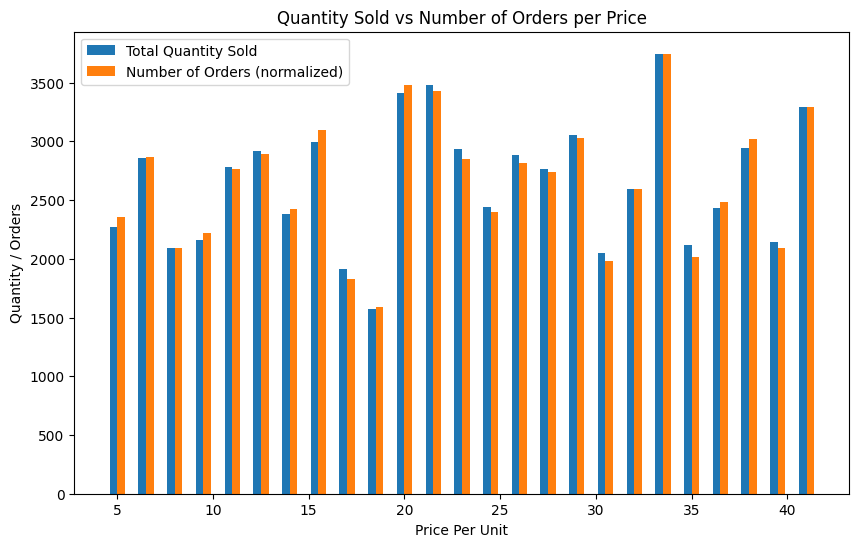

In [103]:

# Total quantity sold per price
qty_per_price = df.groupby('Price Per Unit')['Quantity'].sum().sort_index()

# Number of orders per price
orders_per_price = df['Price Per Unit'].value_counts().sort_index()

# Normalize orders to match the scale of quantity (optional)
orders_norm = orders_per_price / orders_per_price.max() * qty_per_price.max()

plt.figure(figsize=(10,6))
plt.bar(qty_per_price.index - 0.2, qty_per_price.values, width=0.4, label='Total Quantity Sold')
plt.bar(orders_norm.index + 0.2, orders_norm.values, width=0.4, label='Number of Orders (normalized)')

plt.xlabel('Price Per Unit')
plt.ylabel('Quantity / Orders')
plt.title('Quantity Sold vs Number of Orders per Price')
plt.legend()
plt.show()

# Visualize categorical columns' distribution

In [48]:
categorical= df.select_dtypes(include='object')
print(categorical.columns)

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Payment Method',
       'Location', 'Transaction Date', 'Discount Applied'],
      dtype='object')


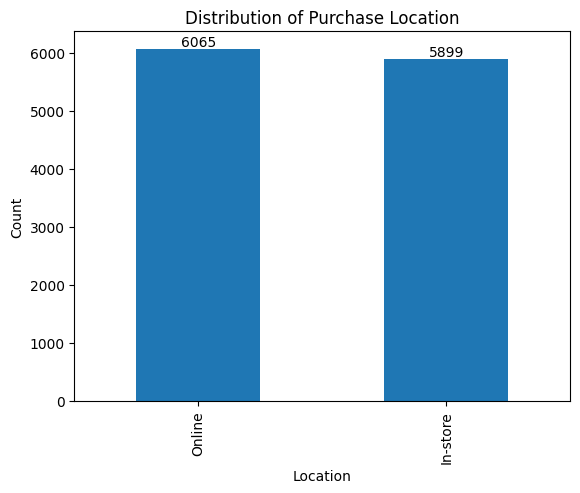

In [113]:
# Histogram for categorical column
counts = df['Location'].value_counts()

# Create bar plot with counts
ax = counts.plot(kind='bar')

# Add count labels on top of bars
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')


plt.title('Distribution of Purchase Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

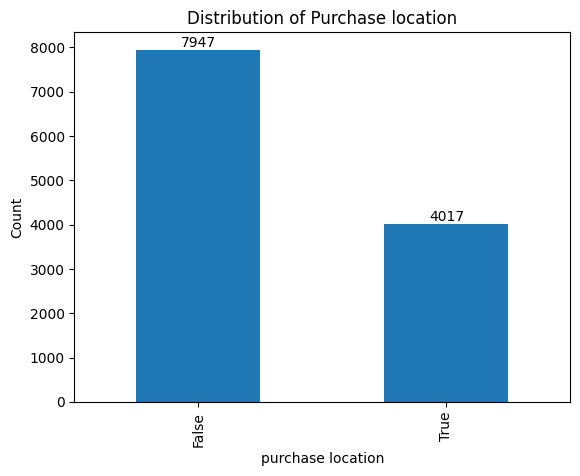

In [111]:
# Histogram for categorical column
counts = df['Discount Applied'].value_counts()

# Create bar plot with counts
ax = counts.plot(kind='bar')

# Add count labels on top of bars
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')


plt.title('Distribution of Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Count')
plt.show()

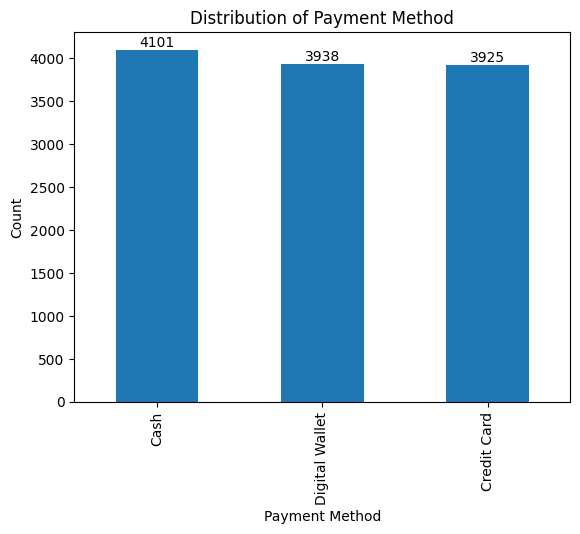

In [110]:
counts = df['Payment Method'].value_counts()

# Create bar plot with counts
ax = counts.plot(kind='bar')

# Add count labels on top of bars
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')


plt.title('Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

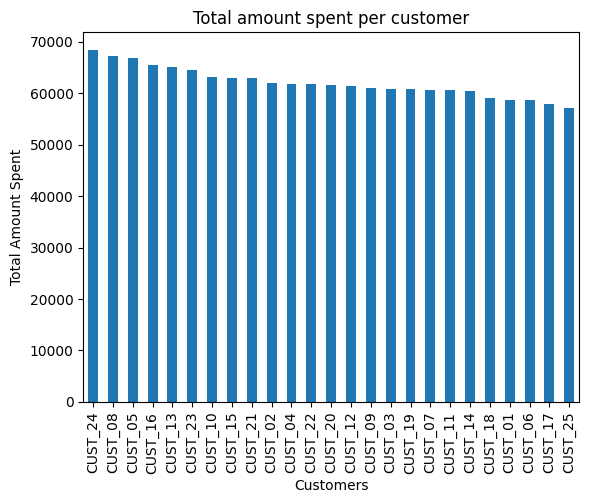

In [108]:
amount_per_cums = df.groupby('Customer ID')['Total Spent'].sum().sort_values(ascending=False)

amount_per_cums.plot(kind='bar')
plt.xlabel('Customers')
plt.ylabel('Total Amount Spent')
plt.title('Total amount spent per customer')
plt.show()

In [128]:

customer_spent = df.groupby('Customer ID')['Total Spent'].sum()

most = customer_spent.idxmax()
least = customer_spent.idxmin()
mean_spent = customer_spent.mean()

total_spent = customer_spent.max()
least_spent = customer_spent.min()

print(f"Customer {most} spent the most: ${total_spent:.2f}")
print(f"Customer {least} spent the least: ${least_spent:.2f}")
print(f"Average spending per customer: ${mean_spent:.2f}")

Customer CUST_24 spent the most: $68452.00
Customer CUST_25 spent the least: $57155.50
Average spending per customer: $62056.20


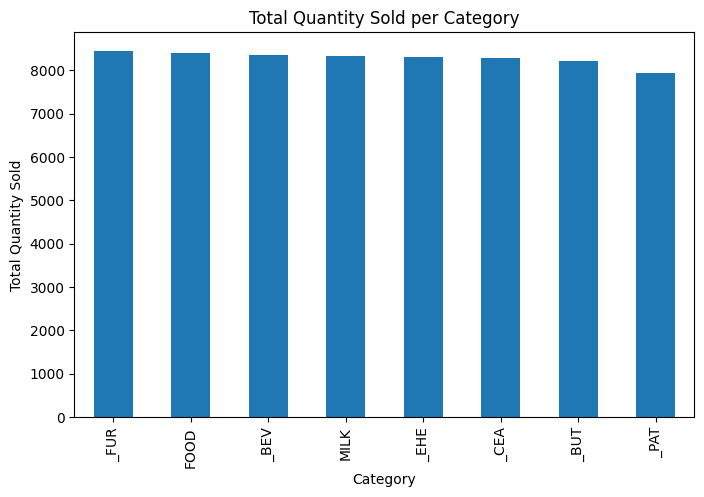

In [122]:
df['Category'] = df['Item'].str[-4:]
qty_per_category = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

qty_per_category.plot(kind='bar', figsize=(8,5))
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold per Category')
plt.show()

In [125]:
# Sum quantity per item
qty_per_item = df.groupby('Item')['Quantity'].sum()

# Find the most bought item
most_bought_item = qty_per_item.idxmax()
most_bought_qty = qty_per_item.max()

# Get the price (assuming 'Price Per Unit' column)
price = df.loc[df['Item'] == most_bought_item, 'Price Per Unit'].iloc[0]

print(f"The most bought item is '{most_bought_item}' with {most_bought_qty} pieces sold at ${price:.2f} each.")

The most bought item is 'Item_2_BEV' with 693.0 pieces sold at $6.50 each.


#Insights:
	1.	No correlation between price and quantity sold → Indicates high demand across all items; customers buy both cheap and expensive items.
	2.	Average spending per order is around $130.
	3.	Most purchased item: Item 2 from Beverages, sold at $6.50 per piece.
	4.	Sales per category are almost equal, with ~8,000 pieces sold per category.
	5.	Customer spending extremes:
	•	Highest: CUST_24 → $68,452
	•	Lowest: CUST_25 → $57,155.50
	•	Average per customer: $62,056.20
	6.	Sales channels: No significant variation between in-store and online purchases.
	7.	Discounts: Most customers did not receive a discount.
	8.	Payment method: Cash purchases were the most common, though not by a large margin.


#Actionable Recommendations:
	1.	Inventory focus: Stock more of high-demand items like Item 2 (Beverages) to prevent stockouts.
	2.	Promotions: Since discounts are rarely used, consider targeted promotions to increase sales for slower-moving items.
	3.	Category management: As all categories sell similarly, maintain balanced stock levels rather than focusing on a single category.
	4.	Customer segmentation: Identify top-spending customers (CUST_24) and offer loyalty programs to encourage repeat purchases.
	5.	Payment & sales channels: Since most sales are cash and channels are similar, no urgent need to prioritize online over in-store, but monitoring trends could help optimize operations.

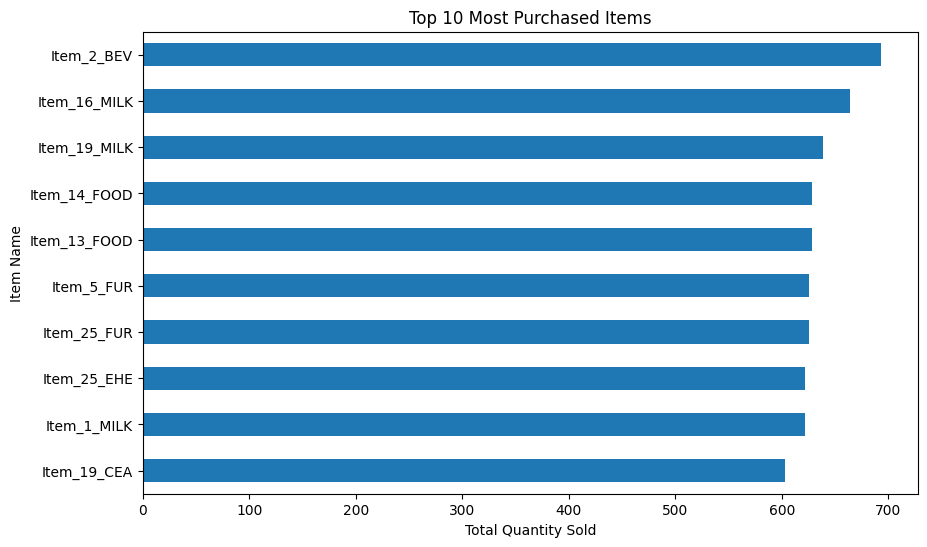

In [132]:
qty_per_item = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False).head(10)
qty_per_item.plot(kind='barh', figsize=(10,6))
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item Name')
plt.title('Top 10 Most Purchased Items')
plt.gca().invert_yaxis()  # highest at top
plt.show()

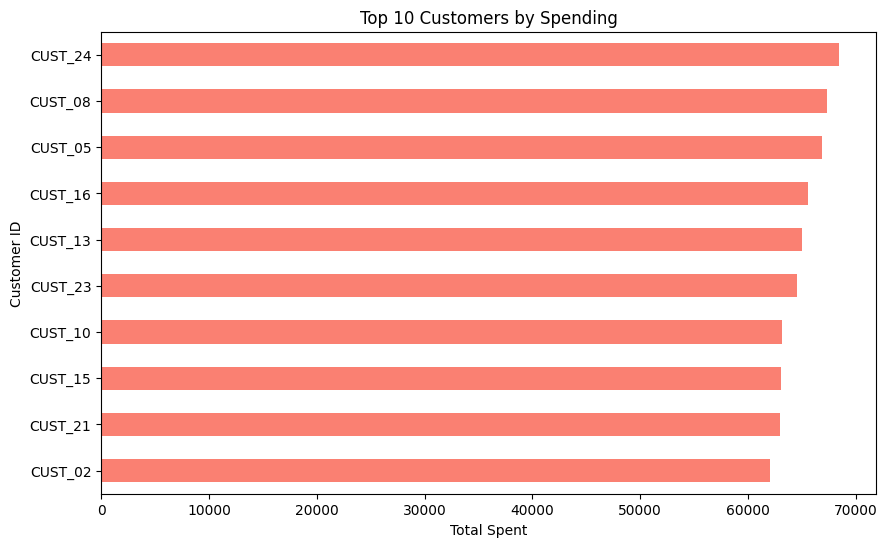

In [133]:
customer_spent = df.groupby('Customer ID')['Total Spent'].sum().sort_values(ascending=False).head(10)
customer_spent.plot(kind='barh', figsize=(10,6), color='salmon')
plt.xlabel('Total Spent')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers by Spending')
plt.gca().invert_yaxis()
plt.show()

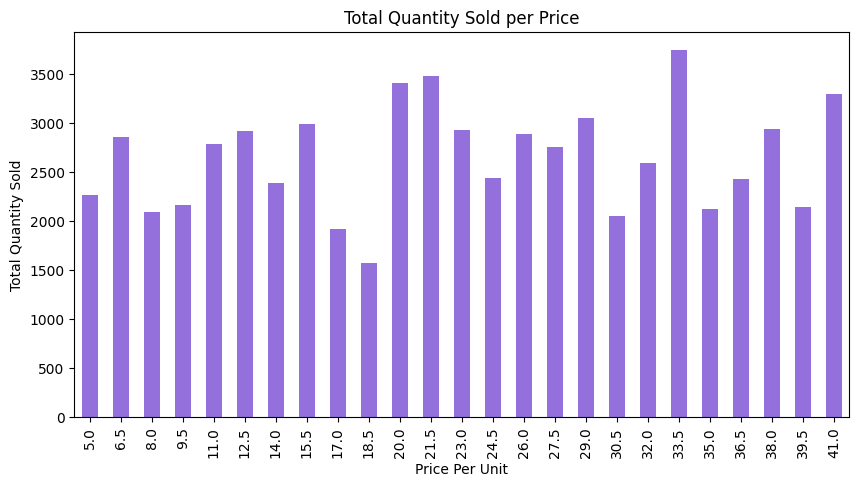

In [134]:
qty_per_price = df.groupby('Price Per Unit')['Quantity'].sum().sort_index()
qty_per_price.plot(kind='bar', figsize=(10,5), color='mediumpurple')
plt.xlabel('Price Per Unit')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold per Price')
plt.show()

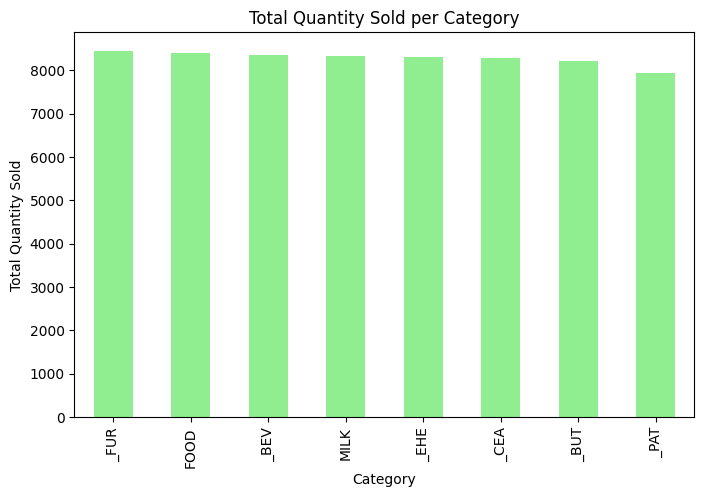

In [136]:
import matplotlib.pyplot as plt

qty_per_category = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
qty_per_category.plot(kind='bar', figsize=(8,5), color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold per Category')
plt.show()

In [138]:
# Save the DataFrame to Excel
df.to_excel('processed_sales_data.xlsx', index=False)

In [139]:
from google.colab import files
files.download('processed_sales_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>